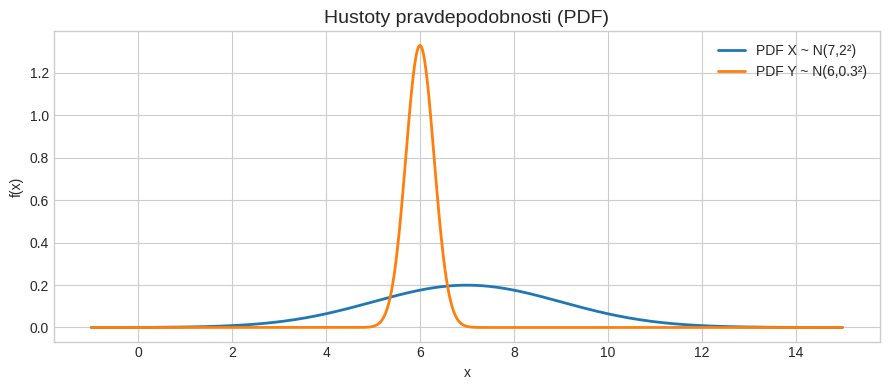

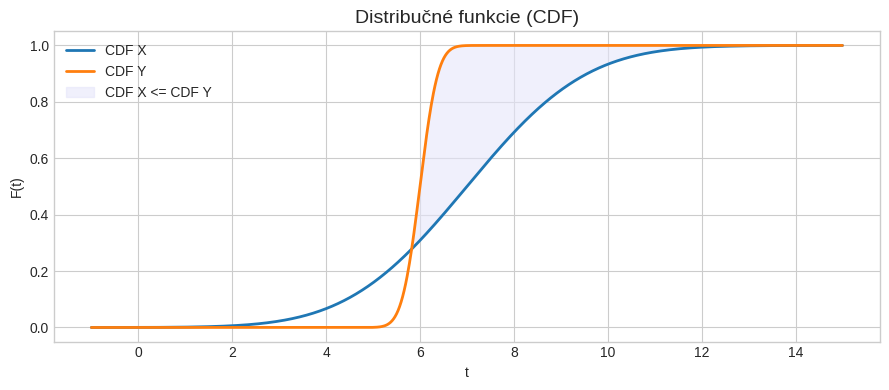

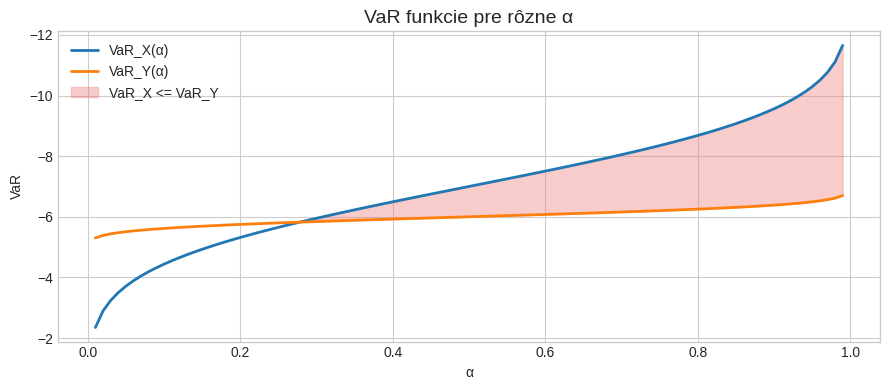

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.style.use('seaborn-v0_8-whitegrid')

# Parametre
mu_X, sigma_X = 7, 2
mu_Y, sigma_Y = 6, 0.3

# Rozsah pre všetky grafy
x_min = min(mu_X - 4*sigma_X, mu_Y - 4*sigma_Y)
x_max = max(mu_X + 4*sigma_X, mu_Y + 4*sigma_Y)
x = np.linspace(x_min, x_max, 1000)

# 1) PDF
pdf_X = norm.pdf(x, loc=mu_X, scale=sigma_X)
pdf_Y = norm.pdf(x, loc=mu_Y, scale=sigma_Y)

plt.figure(figsize=(9, 4))
plt.plot(x, pdf_X, lw=2, label=f'PDF X ~ N({mu_X},{sigma_X}²)', color='#1f77b4')
plt.plot(x, pdf_Y, lw=2, label=f'PDF Y ~ N({mu_Y},{sigma_Y}²)', color='#ff7f0e')
plt.title("Hustoty pravdepodobnosti (PDF)", fontsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) CDF
F_X = norm.cdf(x, loc=mu_X, scale=sigma_X)
F_Y = norm.cdf(x, loc=mu_Y, scale=sigma_Y)

plt.figure(figsize=(9, 4))
plt.plot(x, F_X, lw=2, label='CDF X', color='#1f77b4')
plt.plot(x, F_Y, lw=2, label='CDF Y', color='#ff7f0e')
plt.fill_between(x, F_X, F_Y, where=(F_X <= F_Y),
                 color='lavender', alpha=0.6,
                 label='CDF X <= CDF Y')
plt.title("Distribučné funkcie (CDF)", fontsize=14)
plt.xlabel("t")
plt.ylabel("F(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3) VaR
alpha = np.linspace(0.01, 0.99, 99)
Q_X = norm.ppf(alpha, loc=mu_X, scale=sigma_X)
Q_Y = norm.ppf(alpha, loc=mu_Y, scale=sigma_Y)
VaR_X = -Q_X
VaR_Y = -Q_Y

plt.figure(figsize=(9, 4))
plt.plot(alpha, VaR_X, lw=2, label='VaR_X(α)', color='#1f77b4')
plt.plot(alpha, VaR_Y, lw=2, label='VaR_Y(α)', color='#ff7f0e')
plt.fill_between(alpha, VaR_X, VaR_Y, where=(VaR_X <= VaR_Y),
                 color='lightcoral', alpha=0.4,
                 label='VaR_X <= VaR_Y')
plt.title("VaR funkcie pre rôzne α", fontsize=14)
plt.xlabel("α")
plt.ylabel("VaR")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


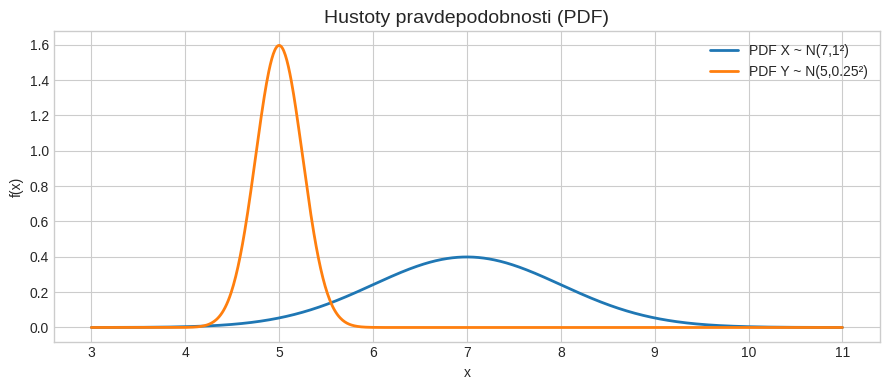

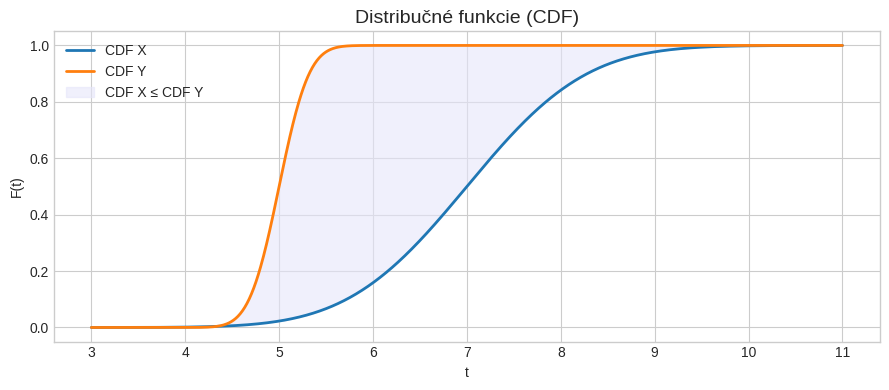

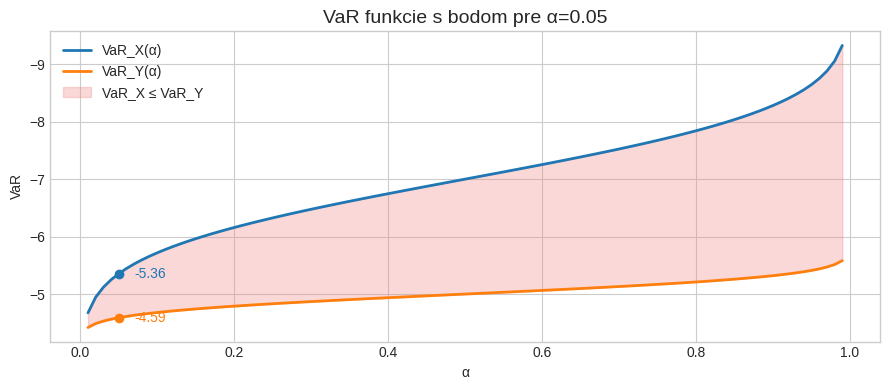

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Používame čistý štýl
plt.style.use('seaborn-v0_8-whitegrid')

# Parametre rozdelení
mu_X, sigma_X = 7, 1       # X ~ N(7,1)
mu_Y, sigma_Y = 5, 0.25    # Y ~ N(5,0.25)

# Rozsah x (±4σ od stredov)
x_min = min(mu_X - 4*sigma_X, mu_Y - 4*sigma_Y)
x_max = max(mu_X + 4*sigma_X, mu_Y + 4*sigma_Y)
x = np.linspace(x_min, x_max, 1000)

# 1) PDF – hustoty pravdepodobnosti
pdf_X = norm.pdf(x, loc=mu_X, scale=sigma_X)
pdf_Y = norm.pdf(x, loc=mu_Y, scale=sigma_Y)

plt.figure(figsize=(9, 4))
plt.plot(x, pdf_X, lw=2, label=f'PDF X ~ N({mu_X},{sigma_X}²)', color='#1f77b4')
plt.plot(x, pdf_Y, lw=2, label=f'PDF Y ~ N({mu_Y},{sigma_Y}²)', color='#ff7f0e')
plt.title("Hustoty pravdepodobnosti (PDF)", fontsize=14)
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

# 2) CDF – distribuční funkcie
F_X = norm.cdf(x, loc=mu_X, scale=sigma_X)
F_Y = norm.cdf(x, loc=mu_Y, scale=sigma_Y)

plt.figure(figsize=(9, 4))
plt.plot(x, F_X, lw=2, label='CDF X', color='#1f77b4')
plt.plot(x, F_Y, lw=2, label='CDF Y', color='#ff7f0e')
plt.fill_between(x, F_X, F_Y, where=(F_X <= F_Y),
                 color='lavender', alpha=0.6,
                 label='CDF X ≤ CDF Y')
plt.title("Distribučné funkcie (CDF)", fontsize=14)
plt.xlabel("t"); plt.ylabel("F(t)")
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

# 3) VaR funkcie pre α=0.05
alphas = np.linspace(0.01, 0.99, 99)
Q_X = norm.ppf(alphas, loc=mu_X, scale=sigma_X)
Q_Y = norm.ppf(alphas, loc=mu_Y, scale=sigma_Y)
VaR_X = -Q_X
VaR_Y = -Q_Y

# Pevná hladina
alpha0 = 0.05
VaR_X0 = -norm.ppf(alpha0, loc=mu_X, scale=sigma_X)
VaR_Y0 = -norm.ppf(alpha0, loc=mu_Y, scale=sigma_Y)

plt.figure(figsize=(9, 4))
plt.plot(alphas, VaR_X, lw=2, label='VaR_X(α)', color='#1f77b4')
plt.plot(alphas, VaR_Y, lw=2, label='VaR_Y(α)', color='#ff7f0e')
plt.fill_between(alphas, VaR_X, VaR_Y, where=(VaR_X <= VaR_Y),
                 color='lightcoral', alpha=0.3,
                 label='VaR_X ≤ VaR_Y')

# Označenie bodov pre α=0.05
plt.scatter([alpha0], [VaR_X0], color='#1f77b4', zorder=5)
plt.scatter([alpha0], [VaR_Y0], color='#ff7f0e', zorder=5)
plt.text(alpha0+0.02, VaR_X0, f'{VaR_X0:.2f}', color='#1f77b4', va='center')
plt.text(alpha0+0.02, VaR_Y0, f'{VaR_Y0:.2f}', color='#ff7f0e', va='center')

plt.title(f'VaR funkcie s bodom pre α={alpha0}', fontsize=14)
plt.xlabel("α"); plt.ylabel("VaR")
plt.legend(); plt.grid(True)
plt.gca().invert_yaxis()  # vyššie hodnoty VaR (väčšie straty) smerujú nahor
plt.tight_layout()
plt.show()


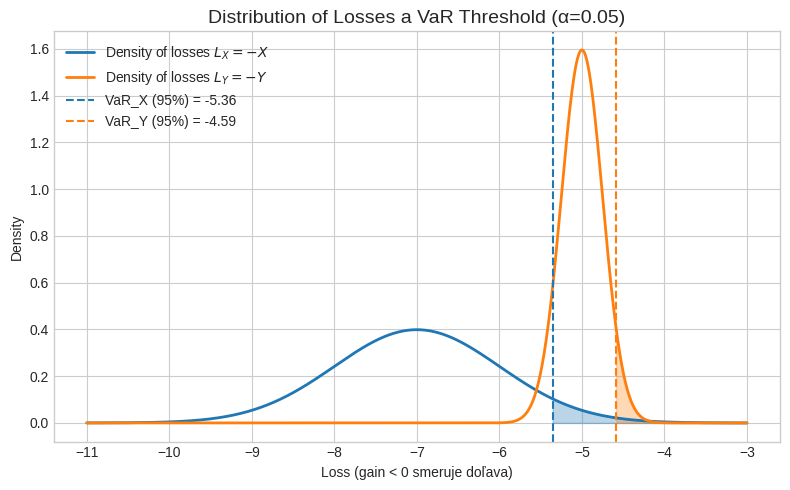

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.style.use('seaborn-v0_8-whitegrid')

# Parametre X ~ N(7,1) a Y ~ N(5,0.25)
mu_X, sigma_X = 7, 1
mu_Y, sigma_Y = 5, 0.25

# Prepočítame na loss-distributions L = -Z
mu_LX, sigma_LX = -mu_X, sigma_X
mu_LY, sigma_LY = -mu_Y, sigma_Y

# hladina VaR
alpha = 0.05
p = int((1-alpha)*100)  # napr. 95

# spoločný rozsah pre l (loss)
l_min = min(mu_LX - 4*sigma_LX, mu_LY - 4*sigma_LY)
l_max = max(mu_LX + 4*sigma_LX, mu_LY + 4*sigma_LY)
l = np.linspace(l_min, l_max, 1000)

# hustoty strát
pdf_LX = norm.pdf(l, loc=mu_LX, scale=sigma_LX)
pdf_LY = norm.pdf(l, loc=mu_LY, scale=sigma_LY)

# prahy VaR
V_X = norm.ppf(1-alpha, loc=mu_LX, scale=sigma_LX)
V_Y = norm.ppf(1-alpha, loc=mu_LY, scale=sigma_LY)

# vykreslenie
plt.figure(figsize=(8,5))
plt.plot(l, pdf_LX, lw=2, label='Density of losses $L_X=-X$', color='#1f77b4')
plt.plot(l, pdf_LY, lw=2, label='Density of losses $L_Y=-Y$', color='#ff7f0e')

# vertikálne čiary pre VaR
plt.axvline(V_X, color='#1f77b4', linestyle='--', label=f'VaR_X ({p}%) = {V_X:.2f}')
plt.axvline(V_Y, color='#ff7f0e', linestyle='--', label=f'VaR_Y ({p}%) = {V_Y:.2f}')

# vyplnenie chvostov
plt.fill_between(l, 0, pdf_LX, where=(l>=V_X), color='#1f77b4', alpha=0.3)
plt.fill_between(l, 0, pdf_LY, where=(l>=V_Y), color='#ff7f0e', alpha=0.3)

plt.title(f'Distribution of Losses a VaR Threshold (α={alpha})', fontsize=14)
plt.xlabel('Loss (gain < 0 smeruje doľava)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


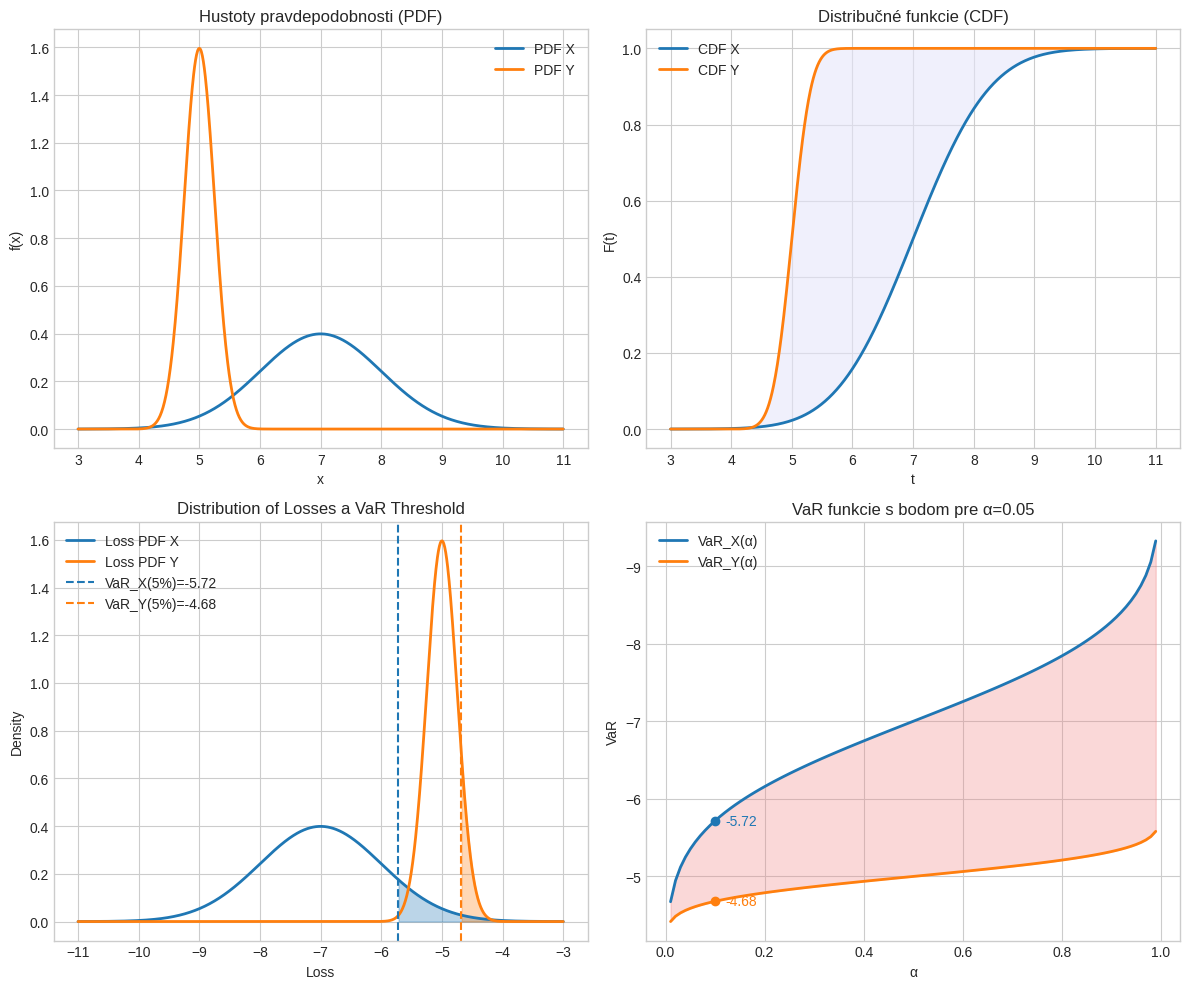

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.style.use('seaborn-v0_8-whitegrid')

# Parametre rozdelení
mu_X, sigma_X = 7, 1       # X ~ N(7,1)
mu_Y, sigma_Y = 5, 0.25    # Y ~ N(5,0.25)

# Rozsah x (±4σ od stredov)
x_min = min(mu_X - 4*sigma_X, mu_Y - 4*sigma_Y)
x_max = max(mu_X + 4*sigma_X, mu_Y + 4*sigma_Y)
x = np.linspace(x_min, x_max, 1000)

# PDF
pdf_X = norm.pdf(x, loc=mu_X, scale=sigma_X)
pdf_Y = norm.pdf(x, loc=mu_Y, scale=sigma_Y)

# CDF
F_X = norm.cdf(x, loc=mu_X, scale=sigma_X)
F_Y = norm.cdf(x, loc=mu_Y, scale=sigma_Y)

# Loss distributions L = -Z
mu_LX, sigma_LX = -mu_X, sigma_X
mu_LY, sigma_LY = -mu_Y, sigma_Y
l = np.linspace(min(mu_LX-4*sigma_LX, mu_LY-4*sigma_LY),
                max(mu_LX+4*sigma_LX, mu_LY+4*sigma_LY), 1000)
pdf_LX = norm.pdf(l, loc=mu_LX, scale=sigma_LX)
pdf_LY = norm.pdf(l, loc=mu_LY, scale=sigma_LY)

# VaR curves
alphas = np.linspace(0.01, 0.99, 99)
Q_X = norm.ppf(alphas, loc=mu_X, scale=sigma_X)
Q_Y = norm.ppf(alphas, loc=mu_Y, scale=sigma_Y)
VaR_X = -Q_X
VaR_Y = -Q_Y

# Single threshold
alpha0 = 0.1
V_X0 = -norm.ppf(alpha0, loc=mu_X, scale=sigma_X)
V_Y0 = -norm.ppf(alpha0, loc=mu_Y, scale=sigma_Y)

# 2x2 Subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1) PDF
axs[0,0].plot(x, pdf_X, lw=2, label='PDF X', color='#1f77b4')
axs[0,0].plot(x, pdf_Y, lw=2, label='PDF Y', color='#ff7f0e')
axs[0,0].set_title('Hustoty pravdepodobnosti (PDF)')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('f(x)')
axs[0,0].legend()
axs[0,0].grid(True)

# 2) CDF
axs[0,1].plot(x, F_X, lw=2, label='CDF X', color='#1f77b4')
axs[0,1].plot(x, F_Y, lw=2, label='CDF Y', color='#ff7f0e')
axs[0,1].fill_between(x, F_X, F_Y, where=(F_X<=F_Y), color='lavender', alpha=0.6)
axs[0,1].set_title('Distribučné funkcie (CDF)')
axs[0,1].set_xlabel('t')
axs[0,1].set_ylabel('F(t)')
axs[0,1].legend()
axs[0,1].grid(True)

# 3) Distribution of Losses + single threshold
axs[1,0].plot(l, pdf_LX, lw=2, label='Loss PDF X', color='#1f77b4')
axs[1,0].plot(l, pdf_LY, lw=2, label='Loss PDF Y', color='#ff7f0e')
axs[1,0].axvline(V_X0, color='#1f77b4', linestyle='--', label=f'VaR_X(5%)={V_X0:.2f}')
axs[1,0].axvline(V_Y0, color='#ff7f0e', linestyle='--', label=f'VaR_Y(5%)={V_Y0:.2f}')
axs[1,0].fill_between(l, 0, pdf_LX, where=(l>=V_X0), color='#1f77b4', alpha=0.3)
axs[1,0].fill_between(l, 0, pdf_LY, where=(l>=V_Y0), color='#ff7f0e', alpha=0.3)
axs[1,0].set_title('Distribution of Losses a VaR Threshold')
axs[1,0].set_xlabel('Loss')
axs[1,0].set_ylabel('Density')
axs[1,0].legend()
axs[1,0].grid(True)

# 4) VaR curves
axs[1,1].plot(alphas, VaR_X, lw=2, label='VaR_X(α)', color='#1f77b4')
axs[1,1].plot(alphas, VaR_Y, lw=2, label='VaR_Y(α)', color='#ff7f0e')
axs[1,1].fill_between(alphas, VaR_X, VaR_Y, where=(VaR_X<=VaR_Y), color='lightcoral', alpha=0.3)
axs[1,1].scatter([alpha0], [V_X0], color='#1f77b4', zorder=5)
axs[1,1].scatter([alpha0], [V_Y0], color='#ff7f0e', zorder=5)
axs[1,1].text(alpha0+0.02, V_X0, f'{V_X0:.2f}', color='#1f77b4', va='center')
axs[1,1].text(alpha0+0.02, V_Y0, f'{V_Y0:.2f}', color='#ff7f0e', va='center')
axs[1,1].set_title('VaR funkcie s bodom pre α=0.05')
axs[1,1].set_xlabel('α')
axs[1,1].set_ylabel('VaR')
axs[1,1].invert_yaxis()
axs[1,1].legend()
axs[1,1].grid(True)

plt.tight_layout()
plt.show()


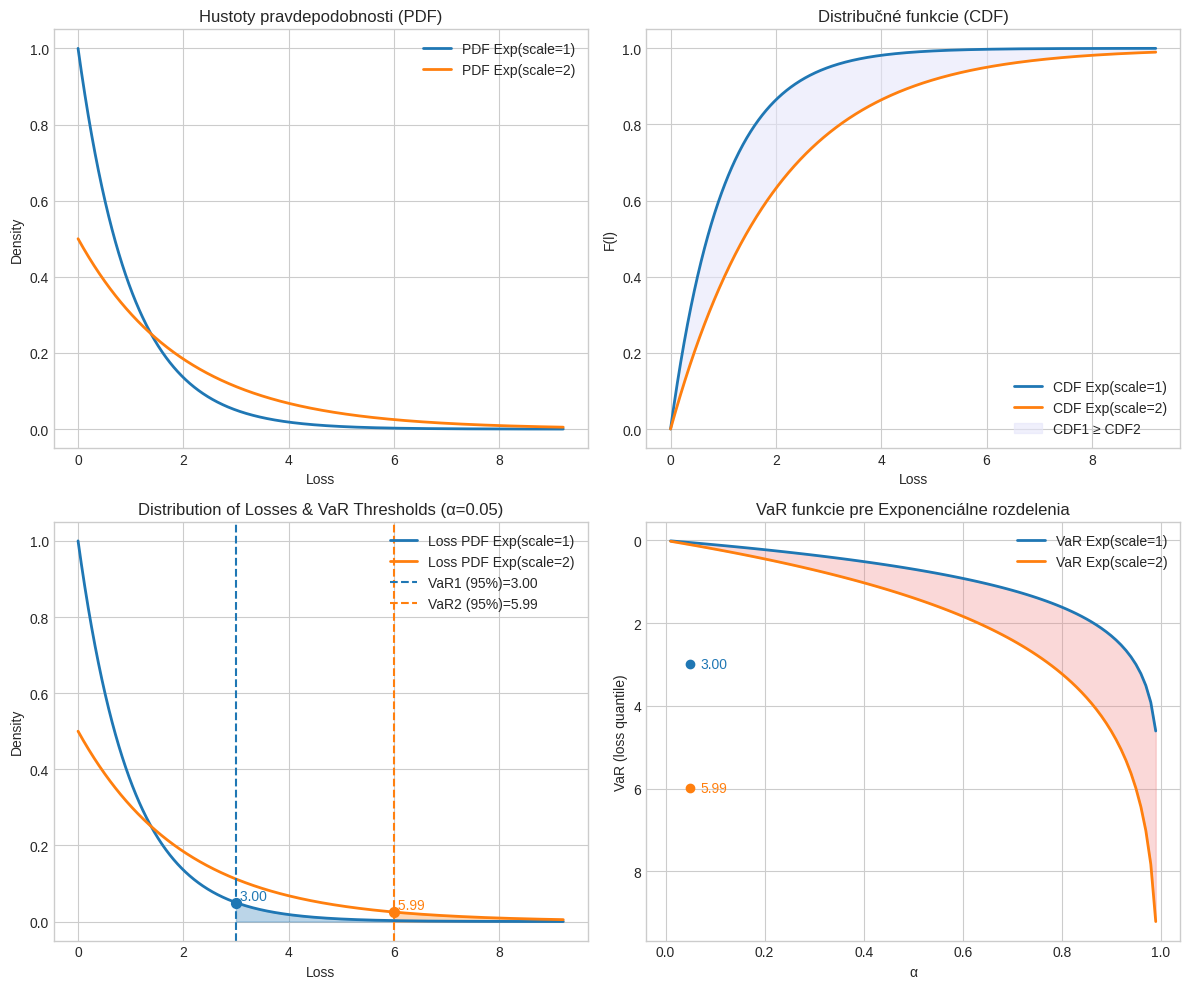

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

plt.style.use('seaborn-v0_8-whitegrid')

# Parametre expo rozdelení (loss distributions)
# L1 ~ Exp(scale=1), L2 ~ Exp(scale=2)
scale1, scale2 = 1, 2

# VaR hladina
alpha0 = 0.05
p = int((1 - alpha0) * 100)  # napr. 95

# 1) PDF a CDF rozsah
l_max = max(expon.ppf(0.99, scale=scale1), expon.ppf(0.99, scale=scale2))
l = np.linspace(0, l_max, 1000)

# hustoty strát
pdf1 = expon.pdf(l, scale=scale1)
pdf2 = expon.pdf(l, scale=scale2)

# CDFy
F1 = expon.cdf(l, scale=scale1)
F2 = expon.cdf(l, scale=scale2)

# VaR prahy (quantily losses)
V1 = expon.ppf(1 - alpha0, scale=scale1)
V2 = expon.ppf(1 - alpha0, scale=scale2)

# VaR funkcie (krivky)
alphas = np.linspace(0.01, 0.99, 99)
VaR1 = expon.ppf(alphas, scale=scale1)
VaR2 = expon.ppf(alphas, scale=scale2)

# 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1) PDF
axs[0,0].plot(l, pdf1, lw=2, label=f'PDF Exp(scale={scale1})', color='#1f77b4')
axs[0,0].plot(l, pdf2, lw=2, label=f'PDF Exp(scale={scale2})', color='#ff7f0e')
axs[0,0].set_title('Hustoty pravdepodobnosti (PDF)')
axs[0,0].set_xlabel('Loss')
axs[0,0].set_ylabel('Density')
axs[0,0].legend()
axs[0,0].grid(True)

# 2) CDF
axs[0,1].plot(l, F1, lw=2, label='CDF Exp(scale=1)', color='#1f77b4')
axs[0,1].plot(l, F2, lw=2, label='CDF Exp(scale=2)', color='#ff7f0e')
axs[0,1].fill_between(l, F1, F2, where=(F1 >= F2), color='lavender', alpha=0.6,
                     label='CDF1 ≥ CDF2')
axs[0,1].set_title('Distribučné funkcie (CDF)')
axs[0,1].set_xlabel('Loss')
axs[0,1].set_ylabel('F(l)')
axs[0,1].legend()
axs[0,1].grid(True)

# 3) Distribution of Losses & VaR Thresholds + body na pdf
# vypočítame pdf v bodoch V1, V2
pdf_V1 = expon.pdf(V1, scale=scale1)
pdf_V2 = expon.pdf(V2, scale=scale2)

axs[1,0].plot(l, pdf1, lw=2, label='Loss PDF Exp(scale=1)', color='#1f77b4')
axs[1,0].plot(l, pdf2, lw=2, label='Loss PDF Exp(scale=2)', color='#ff7f0e')
axs[1,0].axvline(V1, color='#1f77b4', linestyle='--', label=f'VaR1 ({p}%)={V1:.2f}')
axs[1,0].axvline(V2, color='#ff7f0e', linestyle='--', label=f'VaR2 ({p}%)={V2:.2f}')
axs[1,0].fill_between(l, 0, pdf1, where=(l >= V1), color='#1f77b4', alpha=0.3)
axs[1,0].fill_between(l, 0, pdf2, where=(l >= V2), color='#ff7f0e', alpha=0.3)

# pridáme body na pdf-krivkách
axs[1,0].scatter([V1], [pdf_V1], color='#1f77b4', s=50, zorder=5)
axs[1,0].scatter([V2], [pdf_V2], color='#ff7f0e', s=50, zorder=5)
axs[1,0].text(V1, pdf_V1, f' {V1:.2f}', color='#1f77b4', va='bottom')
axs[1,0].text(V2, pdf_V2, f' {V2:.2f}', color='#ff7f0e', va='bottom')

axs[1,0].set_title(f'Distribution of Losses & VaR Thresholds (α={alpha0})')
axs[1,0].set_xlabel('Loss')
axs[1,0].set_ylabel('Density')
axs[1,0].legend()
axs[1,0].grid(True)

# 4) VaR curves
axs[1,1].plot(alphas, VaR1, lw=2, label='VaR Exp(scale=1)', color='#1f77b4')
axs[1,1].plot(alphas, VaR2, lw=2, label='VaR Exp(scale=2)', color='#ff7f0e')
axs[1,1].fill_between(alphas, VaR1, VaR2, where=(VaR1 <= VaR2), color='lightcoral', alpha=0.3)
axs[1,1].scatter([alpha0], [V1], color='#1f77b4', zorder=5)
axs[1,1].scatter([alpha0], [V2], color='#ff7f0e', zorder=5)
axs[1,1].text(alpha0+0.02, V1, f'{V1:.2f}', color='#1f77b4', va='center')
axs[1,1].text(alpha0+0.02, V2, f'{V2:.2f}', color='#ff7f0e', va='center')
axs[1,1].set_title('VaR funkcie pre Exponenciálne rozdelenia')
axs[1,1].set_xlabel('α')
axs[1,1].set_ylabel('VaR (loss quantile)')
axs[1,1].invert_yaxis()
axs[1,1].legend()
axs[1,1].grid(True)

plt.tight_layout()
plt.show()


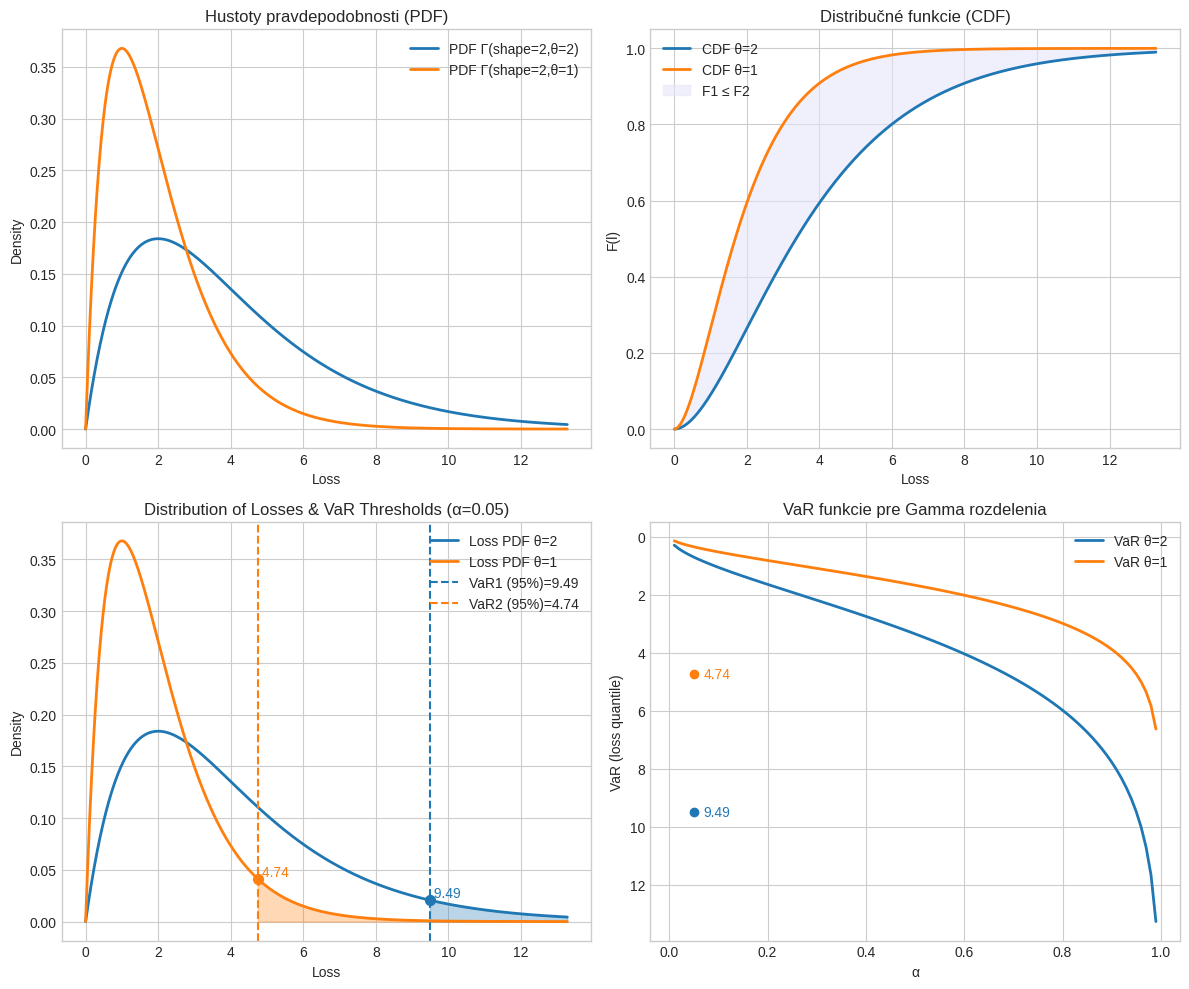

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

plt.style.use('seaborn-v0_8-whitegrid')

# --- Parametre dvoch Gamma rozdelení L1~Gamma(k=2,θ=2) a L2~Gamma(k=2,θ=1)
shape = 2
scale1, scale2 = 2, 1

# hladina VaR
alpha0 = 0.05
p = int((1-alpha0)*100)

# rozsah osi l pre PDF a CDF (do 99%-tile z oboch)
l_max = max(gamma.ppf(0.99, a=shape, scale=scale1),
            gamma.ppf(0.99, a=shape, scale=scale2))
l = np.linspace(0, l_max, 1000)

# 1) PDF
pdf1 = gamma.pdf(l, a=shape, scale=scale1)
pdf2 = gamma.pdf(l, a=shape, scale=scale2)

# 2) CDF
F1 = gamma.cdf(l, a=shape, scale=scale1)
F2 = gamma.cdf(l, a=shape, scale=scale2)

# 3) Jednorazové prahy VaR pre distribution of losses
V1 = gamma.ppf(1-alpha0, a=shape, scale=scale1)
V2 = gamma.ppf(1-alpha0, a=shape, scale=scale2)

# 4) VaR-krivky (kvantily strat ako funkcia α)
alphas = np.linspace(0.01, 0.99, 99)
VaR1 = gamma.ppf(alphas, a=shape, scale=scale1)
VaR2 = gamma.ppf(alphas, a=shape, scale=scale2)

# --- Vykreslenie
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1) PDF
axs[0,0].plot(l, pdf1, lw=2, label=f'PDF Γ(shape={shape},θ={scale1})', color='#1f77b4')
axs[0,0].plot(l, pdf2, lw=2, label=f'PDF Γ(shape={shape},θ={scale2})', color='#ff7f0e')
axs[0,0].set_title('Hustoty pravdepodobnosti (PDF)')
axs[0,0].set_xlabel('Loss')
axs[0,0].set_ylabel('Density')
axs[0,0].legend()
axs[0,0].grid(True)

# 2) CDF
axs[0,1].plot(l, F1, lw=2, label='CDF θ=2', color='#1f77b4')
axs[0,1].plot(l, F2, lw=2, label='CDF θ=1', color='#ff7f0e')
axs[0,1].fill_between(l, F1, F2, where=(F1<=F2), color='lavender', alpha=0.6,
                     label='F1 ≤ F2')
axs[0,1].set_title('Distribučné funkcie (CDF)')
axs[0,1].set_xlabel('Loss')
axs[0,1].set_ylabel('F(l)')
axs[0,1].legend()
axs[0,1].grid(True)

# 3) Distribution of losses + jednorazový VaR prah + body na pdf
# vypočítame pdf v bodoch V1, V2
pdf_V1 = gamma.pdf(V1, a=shape, scale=scale1)
pdf_V2 = gamma.pdf(V2, a=shape, scale=scale2)

axs[1,0].plot(l, pdf1, lw=2, label='Loss PDF θ=2', color='#1f77b4')
axs[1,0].plot(l, pdf2, lw=2, label='Loss PDF θ=1', color='#ff7f0e')
axs[1,0].axvline(V1, color='#1f77b4', ls='--', label=f'VaR1 ({p}%)={V1:.2f}')
axs[1,0].axvline(V2, color='#ff7f0e', ls='--', label=f'VaR2 ({p}%)={V2:.2f}')
axs[1,0].fill_between(l, 0, pdf1, where=(l>=V1), color='#1f77b4', alpha=0.3)
axs[1,0].fill_between(l, 0, pdf2, where=(l>=V2), color='#ff7f0e', alpha=0.3)

# pridáme body na pdf-krivkách
axs[1,0].scatter([V1], [pdf_V1], color='#1f77b4', s=50, zorder=5)
axs[1,0].scatter([V2], [pdf_V2], color='#ff7f0e', s=50, zorder=5)
axs[1,0].text(V1, pdf_V1,  f' {V1:.2f}', color='#1f77b4', va='bottom')
axs[1,0].text(V2, pdf_V2,  f' {V2:.2f}', color='#ff7f0e', va='bottom')

axs[1,0].set_title(f'Distribution of Losses & VaR Thresholds (α={alpha0})')
axs[1,0].set_xlabel('Loss')
axs[1,0].set_ylabel('Density')
axs[1,0].legend()
axs[1,0].grid(True)

# 4) VaR-krivky
axs[1,1].plot(alphas, VaR1, lw=2, label='VaR θ=2', color='#1f77b4')
axs[1,1].plot(alphas, VaR2, lw=2, label='VaR θ=1', color='#ff7f0e')
axs[1,1].fill_between(alphas, VaR1, VaR2, where=(VaR1<=VaR2),
                     color='lightcoral', alpha=0.3)
axs[1,1].scatter([alpha0], [V1], color='#1f77b4', zorder=5)
axs[1,1].scatter([alpha0], [V2], color='#ff7f0e', zorder=5)
axs[1,1].text(alpha0+0.02, V1, f'{V1:.2f}', color='#1f77b4', va='center')
axs[1,1].text(alpha0+0.02, V2, f'{V2:.2f}', color='#ff7f0e', va='center')
axs[1,1].set_title('VaR funkcie pre Gamma rozdelenia')
axs[1,1].set_xlabel('α')
axs[1,1].set_ylabel('VaR (loss quantile)')
axs[1,1].invert_yaxis()
axs[1,1].legend()
axs[1,1].grid(True)

plt.tight_layout()
plt.show()
